In [1]:
#Importing numpy, pandas and matplotlip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import contractions
import unicodedata
from tqdm import tqdm
tqdm.pandas()
tokenizer = ToktokTokenizer()
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
# stopword_list.remove('no')
# stopword_list.remove('not')
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df=pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names=['target','ids','date','flag','user','text'])
df=df[['target','text','date','user']]

In [5]:
df

target                                               text  \
0             0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1             0  is upset that he can't update his Facebook by ...   
2             0  @Kenichan I dived many times for the ball. Man...   
3             0    my whole body feels itchy and like its on fire    
4             0  @nationwideclass no, it's not behaving at all....   
...         ...                                                ...   
1599995       4  Just woke up. Having no school is the best fee...   
1599996       4  TheWDB.com - Very cool to hear old Walt interv...   
1599997       4  Are you ready for your MoJo Makeover? Ask me f...   
1599998       4  Happy 38th Birthday to my boo of alll time!!! ...   
1599999       4  happy #charitytuesday @theNSPCC @SparksCharity...   

                                 date             user  
0        Mon Apr 06 22:19:45 PDT 2009  _TheSpecialOne_  
1        Mon Apr 06 22:19:49 PDT 2009    scotthamilton  
2        Mon Apr 06 22:19:53 PDT 2009         mattycus  
3        Mon Apr 06 22:19:57 PDT 2009          ElleCTF  
4        Mon Apr 06 22:19:57 PDT 2009           Karoli  
...                               ...              ...  
1599995  Tue Jun 16 08:40:49 PDT 2009  AmandaMarie1028  
1599996  Tue Jun 16 08:40:49 PDT 2009      TheWDBoards  
1599997  Tue Jun 16 08:40:49 PDT 2009           bpbabe  
1599998  Tue Jun 16 08:40:49 PDT 2009     tinydiamondz  
1599999  Tue Jun 16 08:40:50 PDT 2009   RyanTrevMorris  

[1600000 rows x 4 columns]

In [6]:
users_df=df[['text','user']]
users_df

text             user
0        @switchfoot http://twitpic.com/2y1zl - Awww, t...  _TheSpecialOne_
1        is upset that he can't update his Facebook by ...    scotthamilton
2        @Kenichan I dived many times for the ball. Man...         mattycus
3          my whole body feels itchy and like its on fire           ElleCTF
4        @nationwideclass no, it's not behaving at all....           Karoli
...                                                    ...              ...
1599995  Just woke up. Having no school is the best fee...  AmandaMarie1028
1599996  TheWDB.com - Very cool to hear old Walt interv...      TheWDBoards
1599997  Are you ready for your MoJo Makeover? Ask me f...           bpbabe
1599998  Happy 38th Birthday to my boo of alll time!!! ...     tinydiamondz
1599999  happy #charitytuesday @theNSPCC @SparksCharity...   RyanTrevMorris

[1600000 rows x 2 columns]

In [7]:
from collections import defaultdict
users=defaultdict(int)
for i in range(len(users_df)):
    mentions = re.findall(r'@(\w+)', users_df['text'].iloc[i])
    for mention in mentions:
        users[mention] += 1
    #users[users_df['user'].iloc[i]]+=1
users

        

defaultdict(int,
            {'switchfoot': 13,
             'Kenichan': 17,
             'nationwideclass': 12,
             'Kwesidei': 1,
             'LOLTrish': 2,
             'Tatiana_K': 8,
             'twittera': 3,
             'caregiving': 2,
             'octolinz16': 1,
             'smarrison': 1,
             'iamjazzyfizzle': 1,
             'iamlilnicki': 1,
             'LettyA': 4,
             'FakerPattyPattz': 2,
             'alydesigns': 1,
             'angry_barista': 1,
             'alielayus': 1,
             'julieebaby': 2,
             'HumpNinja': 2,
             'cocomix04': 1,
             'MissXu': 15,
             'fleurylis': 2,
             'JonathanRKnight': 1074,
             'Viennah': 6,
             'jeancjumbe': 1,
             'tea': 1,
             'localtweeps': 3,
             'andywana': 1,
             'oanhLove': 8,
             'BatManYNG': 3,
             'Starrbby': 8,
             'katortiz': 2,
             'Lt_Algonquin': 11,


In [33]:
users

defaultdict(int,
            {'switchfoot': 13,
             'Kenichan': 17,
             'nationwideclass': 12,
             'Kwesidei': 1,
             'LOLTrish': 2,
             'Tatiana_K': 8,
             'twittera': 3,
             'caregiving': 2,
             'octolinz16': 1,
             'smarrison': 1,
             'iamjazzyfizzle': 1,
             'iamlilnicki': 1,
             'LettyA': 4,
             'FakerPattyPattz': 2,
             'alydesigns': 1,
             'angry_barista': 1,
             'alielayus': 1,
             'julieebaby': 2,
             'HumpNinja': 2,
             'cocomix04': 1,
             'MissXu': 15,
             'fleurylis': 2,
             'JonathanRKnight': 1074,
             'Viennah': 6,
             'jeancjumbe': 1,
             'tea': 1,
             'localtweeps': 3,
             'andywana': 1,
             'oanhLove': 8,
             'BatManYNG': 3,
             'Starrbby': 8,
             'katortiz': 2,
             'Lt_Algonquin': 11,


In [8]:
user_mentions=[]
# for user in users_df['user']:
#     if (user in users.keys()):
#         user_mentions.append(users[user])
#     else:
#         user_mentions.append(0)
for i in range(len(users_df['user'])):
    if (users_df['user'].iloc[i] in users.keys()):
        #print('User Found: ',users_df['user'].iloc[i])
        user_mentions.append(users[users_df['user'].iloc[i]])
    else:
        #print("User not Found: ",users_df['user'].iloc[i])
        user_mentions.append(0)

In [43]:
print(len(user_mentions))

1600000


In [9]:
df['user_mentions']=user_mentions
df

target                                               text  \
0             0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1             0  is upset that he can't update his Facebook by ...   
2             0  @Kenichan I dived many times for the ball. Man...   
3             0    my whole body feels itchy and like its on fire    
4             0  @nationwideclass no, it's not behaving at all....   
...         ...                                                ...   
1599995       4  Just woke up. Having no school is the best fee...   
1599996       4  TheWDB.com - Very cool to hear old Walt interv...   
1599997       4  Are you ready for your MoJo Makeover? Ask me f...   
1599998       4  Happy 38th Birthday to my boo of alll time!!! ...   
1599999       4  happy #charitytuesday @theNSPCC @SparksCharity...   

                                 date             user  user_mentions  
0        Mon Apr 06 22:19:45 PDT 2009  _TheSpecialOne_              0  
1        Mon Apr 06 22:19:49 PDT 2009    scotthamilton              2  
2        Mon Apr 06 22:19:53 PDT 2009         mattycus             35  
3        Mon Apr 06 22:19:57 PDT 2009          ElleCTF              1  
4        Mon Apr 06 22:19:57 PDT 2009           Karoli              7  
...                               ...              ...            ...  
1599995  Tue Jun 16 08:40:49 PDT 2009  AmandaMarie1028              0  
1599996  Tue Jun 16 08:40:49 PDT 2009      TheWDBoards              0  
1599997  Tue Jun 16 08:40:49 PDT 2009           bpbabe              0  
1599998  Tue Jun 16 08:40:49 PDT 2009     tinydiamondz              2  
1599999  Tue Jun 16 08:40:50 PDT 2009   RyanTrevMorris              0  

[1600000 rows x 5 columns]

In [18]:
df['user_mentions']=((df['user_mentions']-0)/3887-0)

In [21]:
df['user_mentions'].to_csv('normalized_Mentions.csv', mode='w', index=False)

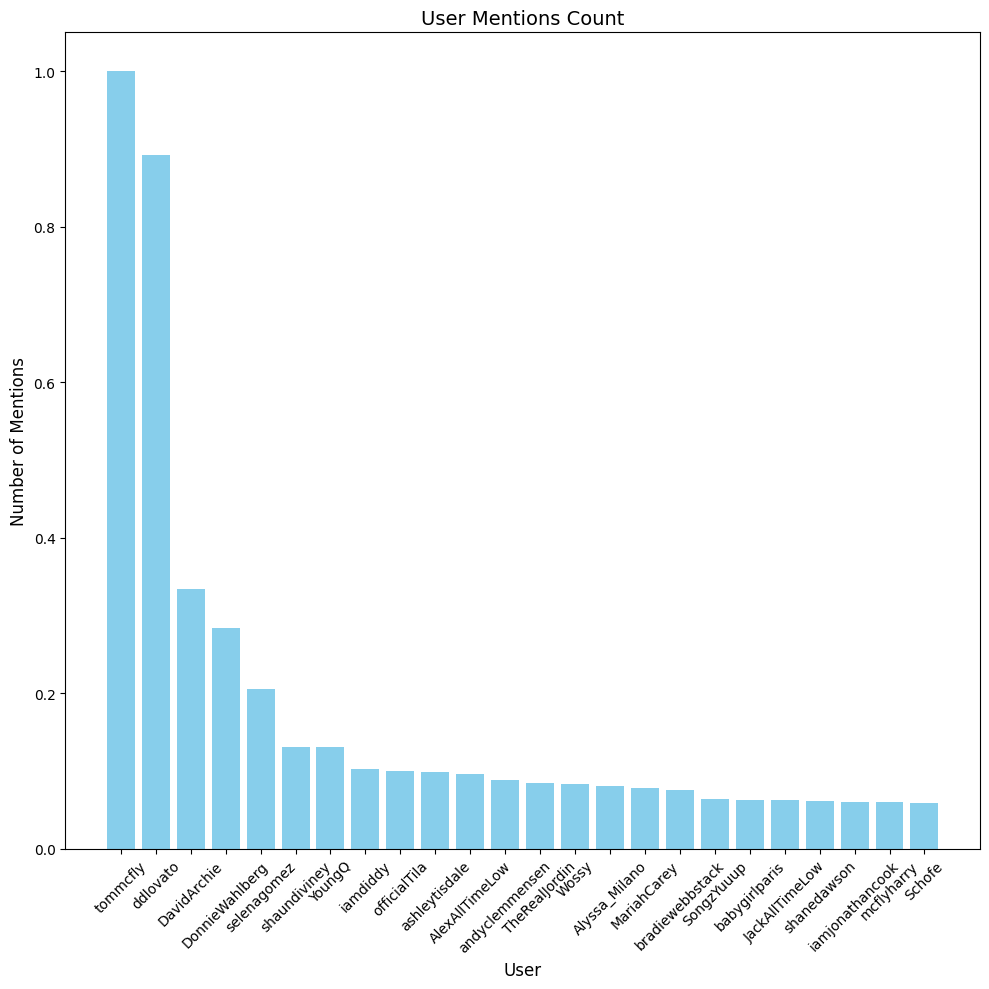

In [19]:
plt.figure(figsize=(10, 10))
df_sorted = df.sort_values(by='user_mentions', ascending=False).iloc[:150]

plt.bar(df_sorted['user'], df_sorted['user_mentions'], color='skyblue')

# Adding titles and labels
plt.title('User Mentions Count', fontsize=14)
plt.xlabel('User', fontsize=12)
plt.ylabel('Number of Mentions', fontsize=12)

# Display the plot
plt.xticks(rotation=45)  # Rotate user names for better visibility
plt.tight_layout()
plt.show()

In [20]:
df_sorted['user_mentions']

647112     1.000000
493334     1.000000
1163954    1.000000
390521     1.000000
234943     1.000000
             ...   
1402980    0.058914
2586       0.058914
840924     0.058914
1465505    0.058914
818858     0.058914
Name: user_mentions, Length: 150, dtype: float64

In [5]:
def lemmatize(text):
    doc = nlp(text)
    lemmatized_output = ' '.join([token.lemma_ for token in doc])
    return lemmatized_output
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text
def remove_special_characters(text):
    pattern = r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text
def remove_stopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
def remove_mentions(TEXT):
    text = re.sub(r'@[A-Za-z0-9]+','',TEXT)
    return text
def remove_url(TEXT):
    text = re.sub('https?://[A-Za-z0-9./]+','',TEXT)
    return text
def remove_hashtag(TEXT):
  text = re.sub("[^a-zA-Z]", " ", TEXT)
  return text
def remove_repeated_chars(text):
    # Use regex to replace repeated characters (more than 2 in a row)
    return re.sub(r'(.)\1{' + str(2) + ',}', r'\1' * 2, text)
def normalize_corpus(doc):

    doc = remove_accented_chars(doc)
    doc = expand_contractions(doc)
    doc = doc.lower()
    doc = remove_mentions(doc)
    doc = remove_url(doc)
    doc = remove_hashtag(doc)
    doc =remove_repeated_chars(doc)

    # remove extra newlines
    doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)

    # remove special characters and\or digits
    # insert spaces between special characters to isolate them
    special_char_pattern = re.compile(r'([{.(-)!}])')
    doc = special_char_pattern.sub(" \\1 ", doc)
    doc = remove_special_characters(doc)

    pat1 = r'@[A-Za-z0-9_]+'
    pat2 = r'https?://[^ ]+'
    www_pat = r'www.[^ ]+'
    combined_pat = r'|'.join((pat1, pat2))
    doc = re.sub(combined_pat, '', doc)
    doc = re.sub(www_pat, '', doc)

    # remove extra whitespace
    doc = re.sub(' +', ' ', doc)

    doc = remove_stopwords(doc)

    doc = lemmatize(doc)

    return doc

In [6]:
df["text"] = df["text"].progress_apply(normalize_corpus)

100%|██████████| 1600000/1600000 [2:08:56<00:00, 206.82it/s] 


In [7]:
df

target                                               text
0             0        aww bummer shoulda get david carr third day
1             0  upset can not update facebook texting might cr...
2             0      dive many time ball manage save rest go bound
3             0                    whole body feel itchy like fire
4             0                      no not behave mad can not see
...         ...                                                ...
1599995       4                      wake no school well feel ever
1599996       4      thewdb com cool hear old walt interviews bmta
1599997       4                     ready mojo makeover ask detail
1599998       4      happy th birthday boo time tupac amaru shakur
1599999       4                               happy charitytuesday

[1600000 rows x 2 columns]

In [8]:
df.to_csv('cleaned_data.csv', mode='a', index=False)

In [22]:
df2=pd.read_csv('cleaned_data.csv')

In [24]:
df2['user_mentions']=df['user_mentions']

In [26]:
df2
df2=df2.dropna(axis=0, how='any')

In [27]:
df2

target                                               text  \
0             0        aww bummer shoulda get david carr third day   
1             0  upset can not update facebook texting might cr...   
2             0      dive many time ball manage save rest go bound   
3             0                    whole body feel itchy like fire   
4             0                      no not behave mad can not see   
...         ...                                                ...   
1599995       4                      wake no school well feel ever   
1599996       4      thewdb com cool hear old walt interviews bmta   
1599997       4                     ready mojo makeover ask detail   
1599998       4      happy th birthday boo time tupac amaru shakur   
1599999       4                               happy charitytuesday   

         user_mentions  
0             0.000000  
1             0.000515  
2             0.009004  
3             0.000257  
4             0.001801  
...                ...  
1599995       0.000000  
1599996       0.000000  
1599997       0.000000  
1599998       0.000515  
1599999       0.000000  

[1593464 rows x 3 columns]

In [28]:
def binary_normalization(x):
    if(x>0):
        return 1
    else:
        return 0
df2['target']=df2['target'].apply(binary_normalization)
df2
df2 = df2.replace(to_replace=r'\bnot\b', value='', regex=True)
df2 = df2.replace(to_replace=r'\bno\b', value='', regex=True)
df2 = df2.replace(to_replace=r'\bquot\b', value='', regex=True)
df2

C:\Users\PC\AppData\Local\Temp\ipykernel_1308\4227264465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['target']=df2['target'].apply(binary_normalization)


target                                               text  \
0             0        aww bummer shoulda get david carr third day   
1             0  upset can  update facebook texting might cry r...   
2             0      dive many time ball manage save rest go bound   
3             0                    whole body feel itchy like fire   
4             0                                behave mad can  see   
...         ...                                                ...   
1599995       1                        wake  school well feel ever   
1599996       1      thewdb com cool hear old walt interviews bmta   
1599997       1                     ready mojo makeover ask detail   
1599998       1      happy th birthday boo time tupac amaru shakur   
1599999       1                               happy charitytuesday   

         user_mentions  
0             0.000000  
1             0.000515  
2             0.009004  
3             0.000257  
4             0.001801  
...                ...  
1599995       0.000000  
1599996       0.000000  
1599997       0.000000  
1599998       0.000515  
1599999       0.000000  

[1593464 rows x 3 columns]

In [152]:
df2=pd.read_csv('cleaned_data.csv')
df2=df2.dropna(axis=0, how='any')
def binary_normalization(x):
    if(x>0):
        return 1
    else:
        return 0
df2['target']=df2['target'].apply(binary_normalization)
df2
df2 = df2.replace(to_replace=r'\bnot\b', value='', regex=True)
df2 = df2.replace(to_replace=r'\bno\b', value='', regex=True)
df2 = df2.replace(to_replace=r'\bquot\b', value='', regex=True)
df2


target                                               text
0             0        aww bummer shoulda get david carr third day
1             0  upset can  update facebook texting might cry r...
2             0      dive many time ball manage save rest go bound
3             0                    whole body feel itchy like fire
4             0                                behave mad can  see
...         ...                                                ...
1599995       1                        wake  school well feel ever
1599996       1      thewdb com cool hear old walt interviews bmta
1599997       1                     ready mojo makeover ask detail
1599998       1      happy th birthday boo time tupac amaru shakur
1599999       1                               happy charitytuesday

[1593464 rows x 2 columns]

In [29]:
df2=df2.dropna(subset=['text'])
df2.to_csv('cleaned_data2.csv', mode='w', index=False)

In [30]:
df2=pd.read_csv('cleaned_data2.csv')
df2=df2.dropna()
df2


target                                               text  \
0             0        aww bummer shoulda get david carr third day   
1             0  upset can  update facebook texting might cry r...   
2             0      dive many time ball manage save rest go bound   
3             0                    whole body feel itchy like fire   
4             0                                behave mad can  see   
...         ...                                                ...   
1593459       1                        wake  school well feel ever   
1593460       1      thewdb com cool hear old walt interviews bmta   
1593461       1                     ready mojo makeover ask detail   
1593462       1      happy th birthday boo time tupac amaru shakur   
1593463       1                               happy charitytuesday   

         user_mentions  
0             0.000000  
1             0.000515  
2             0.009004  
3             0.000257  
4             0.001801  
...                ...  
1593459       0.000000  
1593460       0.000000  
1593461       0.000000  
1593462       0.000515  
1593463       0.000000  

[1592819 rows x 3 columns]

In [31]:
df2.to_csv('cleaned_data2.csv', mode='w', index=False)

In [32]:
df2=pd.read_csv('cleaned_data2.csv')

In [33]:
df2

target                                               text  \
0             0        aww bummer shoulda get david carr third day   
1             0  upset can  update facebook texting might cry r...   
2             0      dive many time ball manage save rest go bound   
3             0                    whole body feel itchy like fire   
4             0                                behave mad can  see   
...         ...                                                ...   
1592814       1                        wake  school well feel ever   
1592815       1      thewdb com cool hear old walt interviews bmta   
1592816       1                     ready mojo makeover ask detail   
1592817       1      happy th birthday boo time tupac amaru shakur   
1592818       1                               happy charitytuesday   

         user_mentions  
0             0.000000  
1             0.000515  
2             0.009004  
3             0.000257  
4             0.001801  
...                ...  
1592814       0.000000  
1592815       0.000000  
1592816       0.000000  
1592817       0.000515  
1592818       0.000000  

[1592819 rows x 3 columns]

In [32]:
#df2.reset_index()

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()
vectorizer2 = TfidfVectorizer()
# Fit and transform the documents into a document-term matrix
#single_row = [df2['text'].iloc[0]]

#vectorizer.fit_transform(df['text'])
vectorizer.fit(df2['text'])
vectorizer2.fit(df2['text'])
# Convert the matrix to an array for viewing
#df_count = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())

# Get the feature names (words)
print(vectorizer.get_feature_names_out())
print(vectorizer2.get_feature_names_out())
print(vectorizer2)

['aa' 'aab' 'aaba' ... 'zzut' 'zzuu' 'zzy']
['aa' 'aab' 'aaba' ... 'zzut' 'zzuu' 'zzy']


AttributeError: 'TfidfVectorizer' object has no attribute 'values'

In [3]:
df2.shape

(1592819, 2)

In [162]:
import pickle

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [163]:
with open('vectorizer2.pkl', 'wb') as f:
    pickle.dump(vectorizer2, f)

In [7]:
neg_doc_matrix = vectorizer.transform(df2[df2['target'] == 0]['text'])
pos_doc_matrix = vectorizer.transform(df2[df2['target'] == 1]['text'])
neg_doc_matrix2 = vectorizer2.transform(df2[df2['target'] == 0]['text'])
pos_doc_matrix2 = vectorizer2.transform(df2[df2['target'] == 1]['text'])
#df_dtm = pd.get_dummies(df2['text'].apply(pd.Series).stack()).sum(level=0)
#neg_doc_matrix = df_dtm[df2['target'] == 0]
#pos_doc_matrix = df_dtm[df2['target'] == 1]
#print(len(neg_doc_matrix))


In [28]:
neg_doc_matrix.shape
print(len(df2[df2['target'] == 0]['text']))
print(len(df2[df2['target'] == 1]['text']))


796450
796369


In [26]:
pos_doc_matrix.shape

(796369, 242934)

In [34]:
neg_tf3 = np.sum(neg_doc_matrix,axis=0)
pos_tf3 = np.sum(pos_doc_matrix,axis=0)
neg3 = np.squeeze(np.asarray(neg_tf3))
pos3 = np.squeeze(np.asarray(pos_tf3))
term_freq_df3 = pd.DataFrame([neg3,pos3],columns=vectorizer.get_feature_names_out())


In [49]:
#term_freq_df3 = pd.DataFrame([neg3], columns=vectorizer.get_feature_names_out())
from scipy.stats import pearsonr
from scipy.stats import pointbiserialr
# Step 4: Add the target label to the DataFrame
#term_freq_df3['label'] = df2['target']
X=vectorizer2.fit_transform(df2['text'])
# Step 5: Calculate the Pearson correlation between each token and the label
correlations = []
for i in range(X.shape[1]):
    word = vectorizer2.get_feature_names_out()[i]
    correlation, _ = pointbiserialr(X[:, i].toarray().flatten(), df2['target'])
    correlations.append((word, correlation))

# Sort and view top correlated words
correlations.sort(key=lambda x: abs(x[1]), reverse=True)
correlations[:10]

KeyboardInterrupt: 

In [44]:
print(vectorizer2)
vectorizer2

TfidfVectorizer()


TfidfVectorizer()

In [37]:
print(correlation_df)

Empty DataFrame
Columns: [Token, Correlation]
Index: []


          negative  positive  total
aa             788       699   1487
aab              0         1      1
aaba             0         1      1
aabangan         0         1      1
aabar            0         1      1
...            ...       ...    ...
zztop            0         1      1
zzu              1         2      3
zzut             0         1      1
zzuu             1         0      1
zzy              2         1      3

[242934 rows x 3 columns]


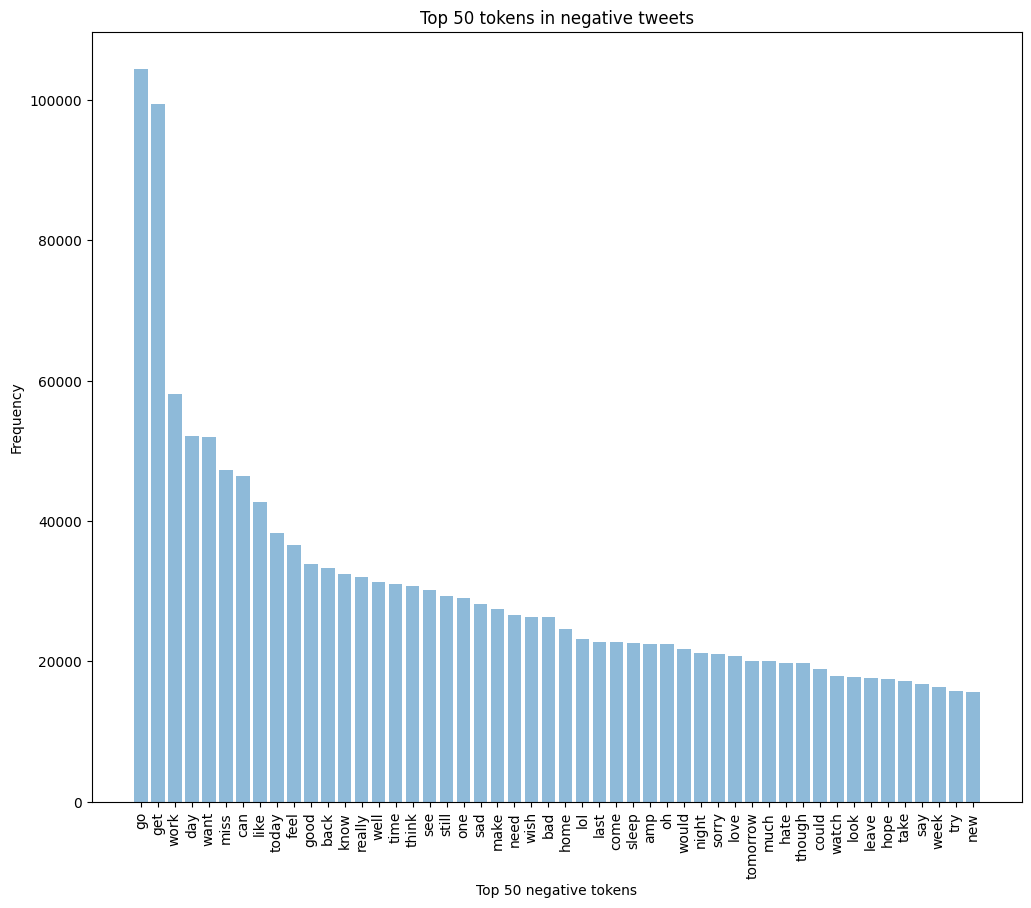

In [16]:
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=vectorizer.get_feature_names_out()).transpose()
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = (term_freq_df['negative'] + term_freq_df['positive']) #/ (len(term_freq_df['positive'])+len(term_freq_df['negative']))
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
term_freq_df['negative']=term_freq_df['negative']#/len(term_freq_df['negative'])
term_freq_df['positive']=term_freq_df['positive']#/len(term_freq_df['positive'])
#term_freq_df['total']=term_freq_df['total']/len(term_freq_df['total'])

plt.bar(y_pos, term_freq_df.sort_values(by='negative',ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative',ascending=False) ['negative']   [:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')
print(term_freq_df)
# def remove_not(text):
#term_freq_df['negative'] = term_freq_df['negative'].replace(to_replace='not', value='', regex=True)
# term_freq_df.apply()


([<matplotlib.axis.XTick at 0x1f303c59280>,
 [Text(0, 0, 'go'),
  Text(1, 0, 'get'),
  Text(2, 0, 'good'),
  Text(3, 0, 'day'),
  Text(4, 0, 'work'),
  Text(5, 0, 'thank'),
  Text(6, 0, 'love'),
  Text(7, 0, 'want'),
  Text(8, 0, 'like'),
  Text(9, 0, 'well'),
  Text(10, 0, 'today'),
  Text(11, 0, 'know'),
  Text(12, 0, 'miss'),
  Text(13, 0, 'can'),
  Text(14, 0, 'see'),
  Text(15, 0, 'time'),
  Text(16, 0, 'lol'),
  Text(17, 0, 'back'),
  Text(18, 0, 'think'),
  Text(19, 0, 'feel'),
  Text(20, 0, 'one'),
  Text(21, 0, 'make'),
  Text(22, 0, 'really'),
  Text(23, 0, 'night'),
  Text(24, 0, 'home'),
  Text(25, 0, 'come'),
  Text(26, 0, 'still'),
  Text(27, 0, 'morning'),
  Text(28, 0, 'need'),
  Text(29, 0, 'watch'),
  Text(30, 0, 'oh'),
  Text(31, 0, 'hope'),
  Text(32, 0, 'would'),
  Text(33, 0, 'new'),
  Text(34, 0, 'twitter'),
  Text(35, 0, 'sleep'),
  Text(36, 0, 'wish'),
  Text(37, 0, 'much'),
  Text(38, 0, 'look'),
  Text(39, 0, 'tomorrow'),
  Text(40, 0, 'amp'),
  Text(41, 0, '

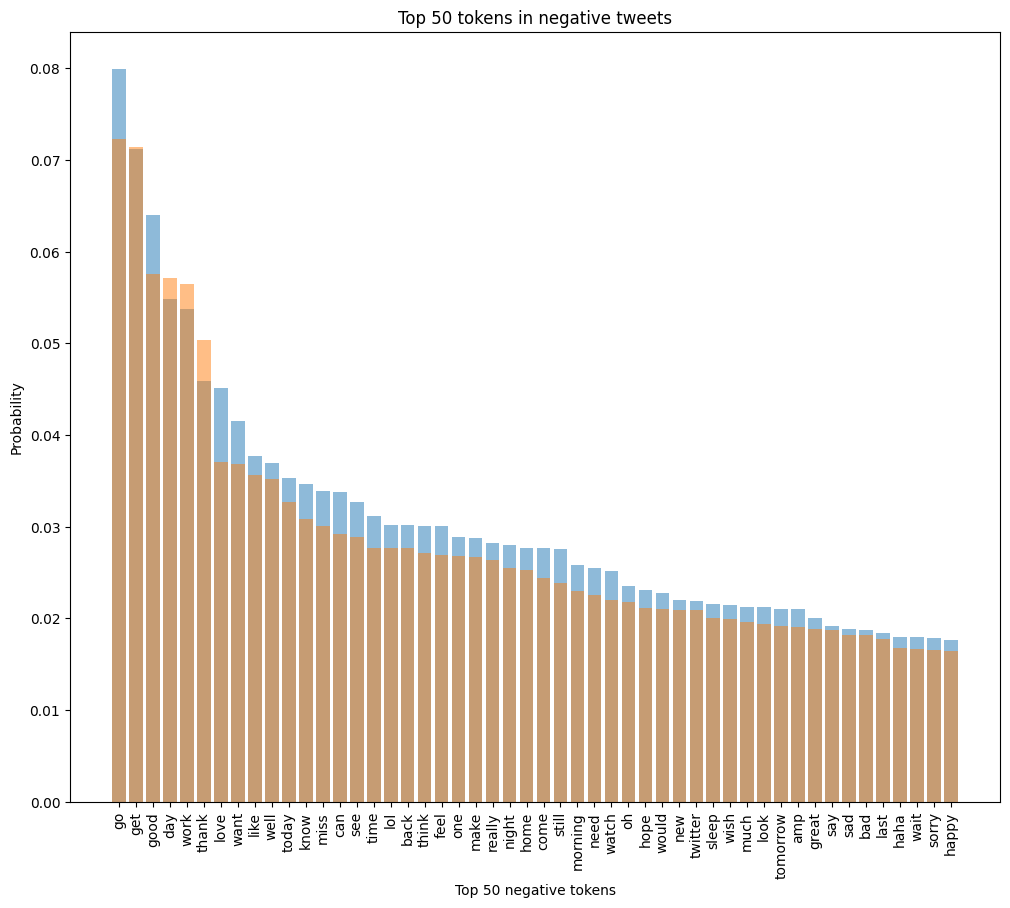

In [14]:
neg_tf2 = np.sum(neg_doc_matrix2,axis=0)
pos_tf2 = np.sum(pos_doc_matrix2,axis=0)
neg2 = np.squeeze(np.asarray(neg_tf2))
pos2 = np.squeeze(np.asarray(pos_tf2))
term_freq_df2 = pd.DataFrame([neg2,pos2],columns=vectorizer2.get_feature_names_out()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = (term_freq_df2['negative'] + term_freq_df2['positive']) / (len(term_freq_df2['positive'])+len(term_freq_df2['negative']))
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]
y_pos2 = np.arange(50)
plt.figure(figsize=(12,10))
term_freq_df2['negative']=term_freq_df2['negative']/len(term_freq_df2['negative'])
term_freq_df2['positive']=term_freq_df2['positive']/len(term_freq_df2['positive'])
term_freq_df2['total']=term_freq_df2['total']/len(term_freq_df2['total'])

plt.bar(y_pos2, term_freq_df2.sort_values(by='negative',ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos2, term_freq_df2.sort_values(by='negative',ascending=False) ['negative']   [:50].index,rotation='vertical')
plt.ylabel('Probability')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')
plt.bar(y_pos2, term_freq_df2.sort_values(by='positive',ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos2, term_freq_df2.sort_values(by='positive',ascending=False) ['positive']   [:50].index,rotation='vertical')
plt.bar(y_pos2, term_freq_df2.sort_values(by='total',ascending=False)['total'][:50], align='center', alpha=0.5)
plt.xticks(y_pos2, term_freq_df2.sort_values(by='total',ascending=False) ['total']   [:50].index,rotation='vertical')
# plt.ylabel('Probability')
# plt.xlabel('Top 50 positive tokens')
# plt.title('Top 50 tokens in positive tweets')
# print(term_freq_df2)

In [31]:
term_freq_df['target']=df2['target']
corrn= term_freq_df[['target','positive']].corr()
corrn

target  positive
target       NaN       NaN
positive     NaN       1.0

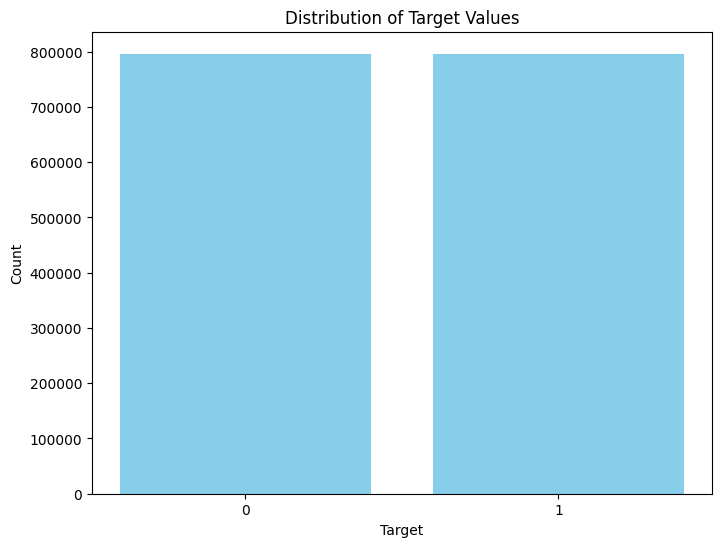

In [178]:
target_counts = df2['target'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(target_counts.index, target_counts.values, color='skyblue')

# Add titles and labels
plt.title('Distribution of Target Values')
plt.xlabel('Target')
plt.ylabel('Count')

# Show the plot
plt.xticks(target_counts.index)  # Ensure ticks match the target values
plt.show()

In [22]:
term_freq_df['total']
term_freq_df['positive']
term_freq_df['negative']

aa          788
aab           0
aaba          0
aabangan      0
aabar         0
           ... 
zztop         0
zzu           1
zzut          0
zzuu          1
zzy           2
Name: negative, Length: 242934, dtype: int64

Text(0.5, 1.0, 'Top 50 tokens in all tweets')

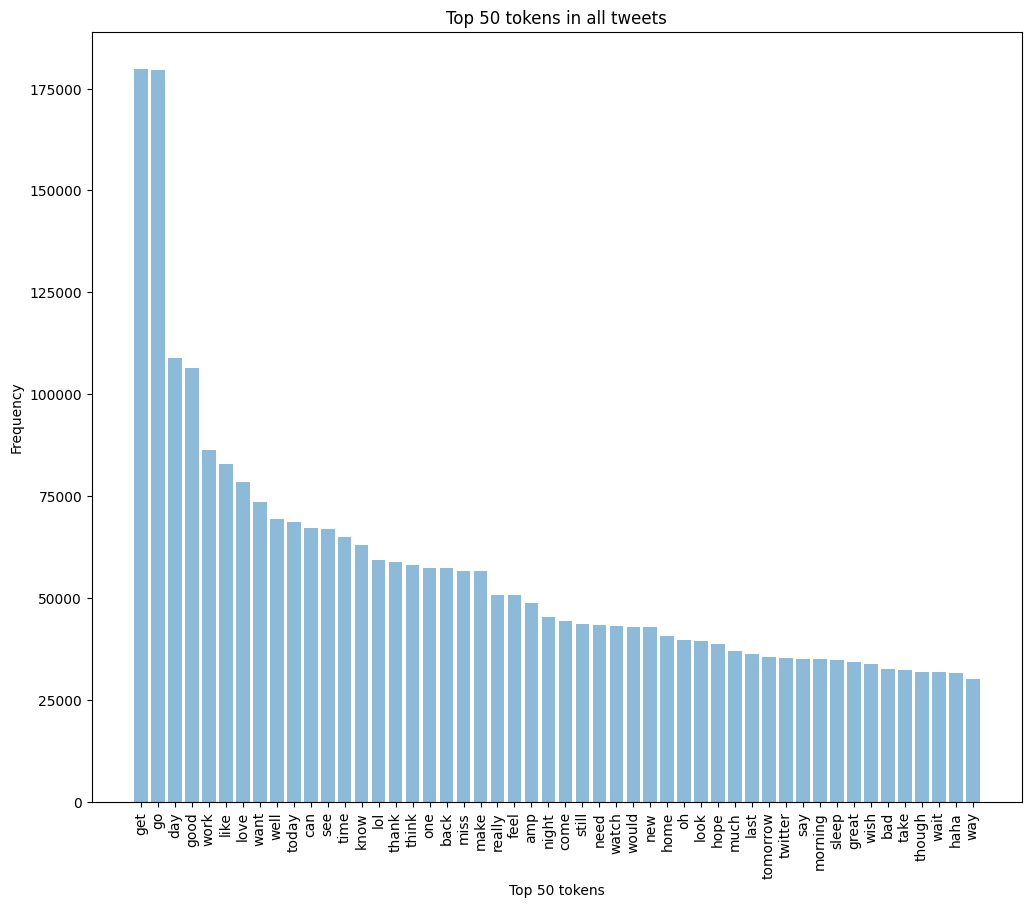

In [17]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='total',ascending=False)       ['total'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='total',ascending=False) ['total']   [:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 tokens')
plt.title('Top 50 tokens in all tweets')

Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

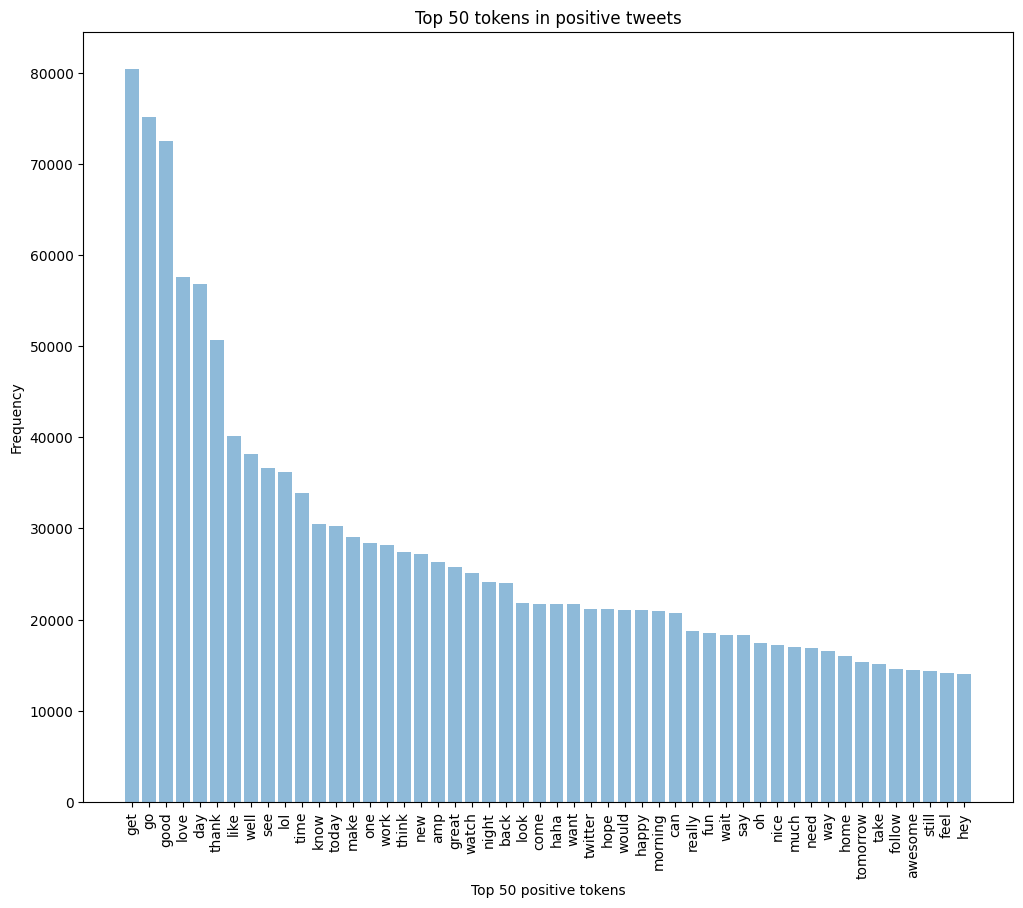

In [18]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive',ascending=False)       ['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive',ascending=False) ['positive']   [:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

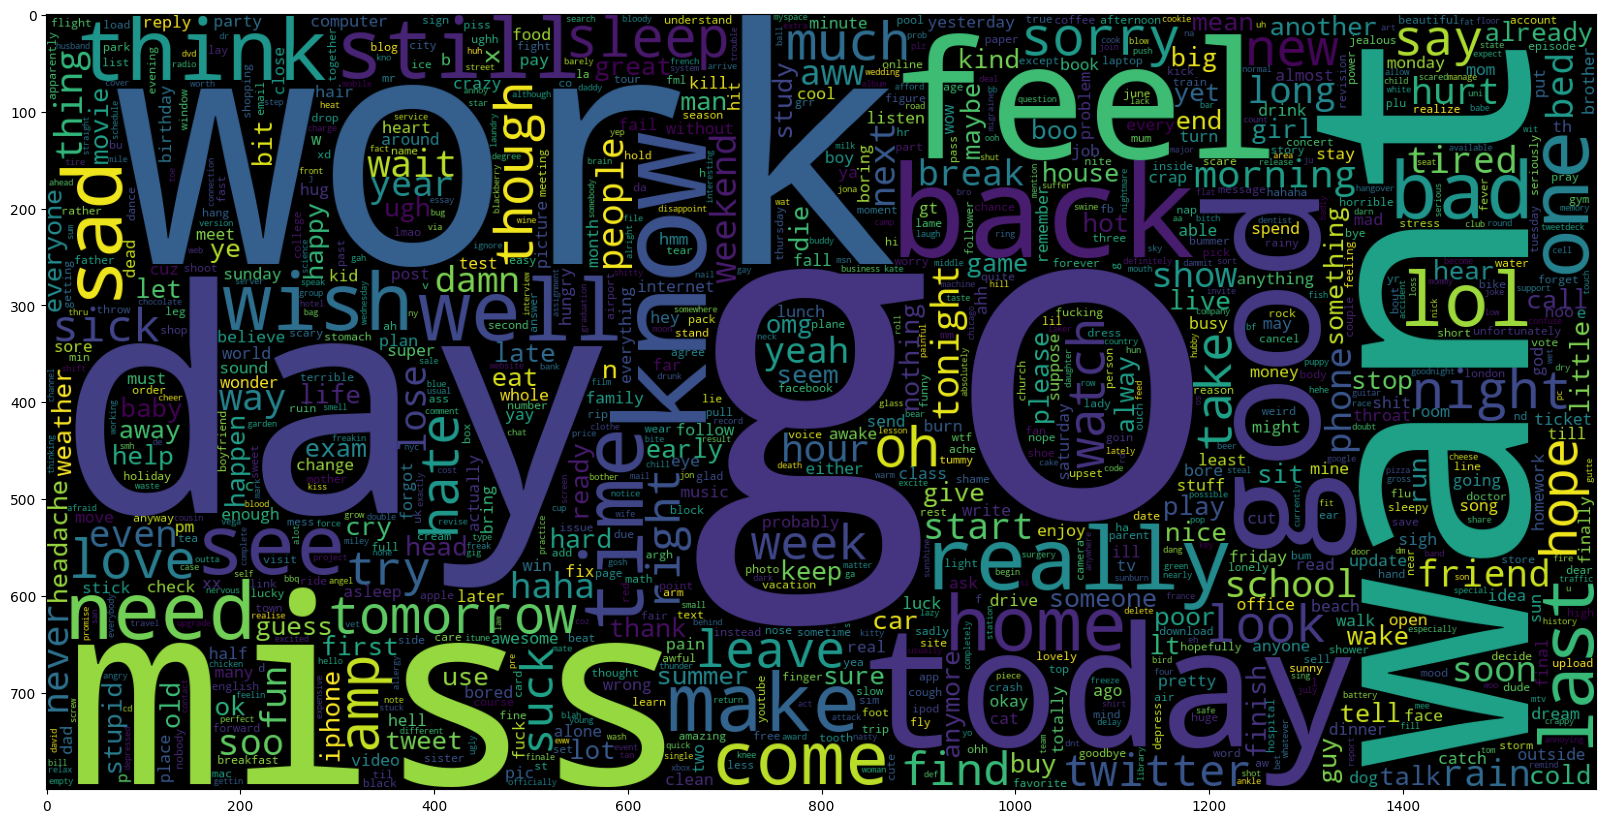

In [168]:
from wordcloud import WordCloud
data_neg = df2[df2['target']==0]['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

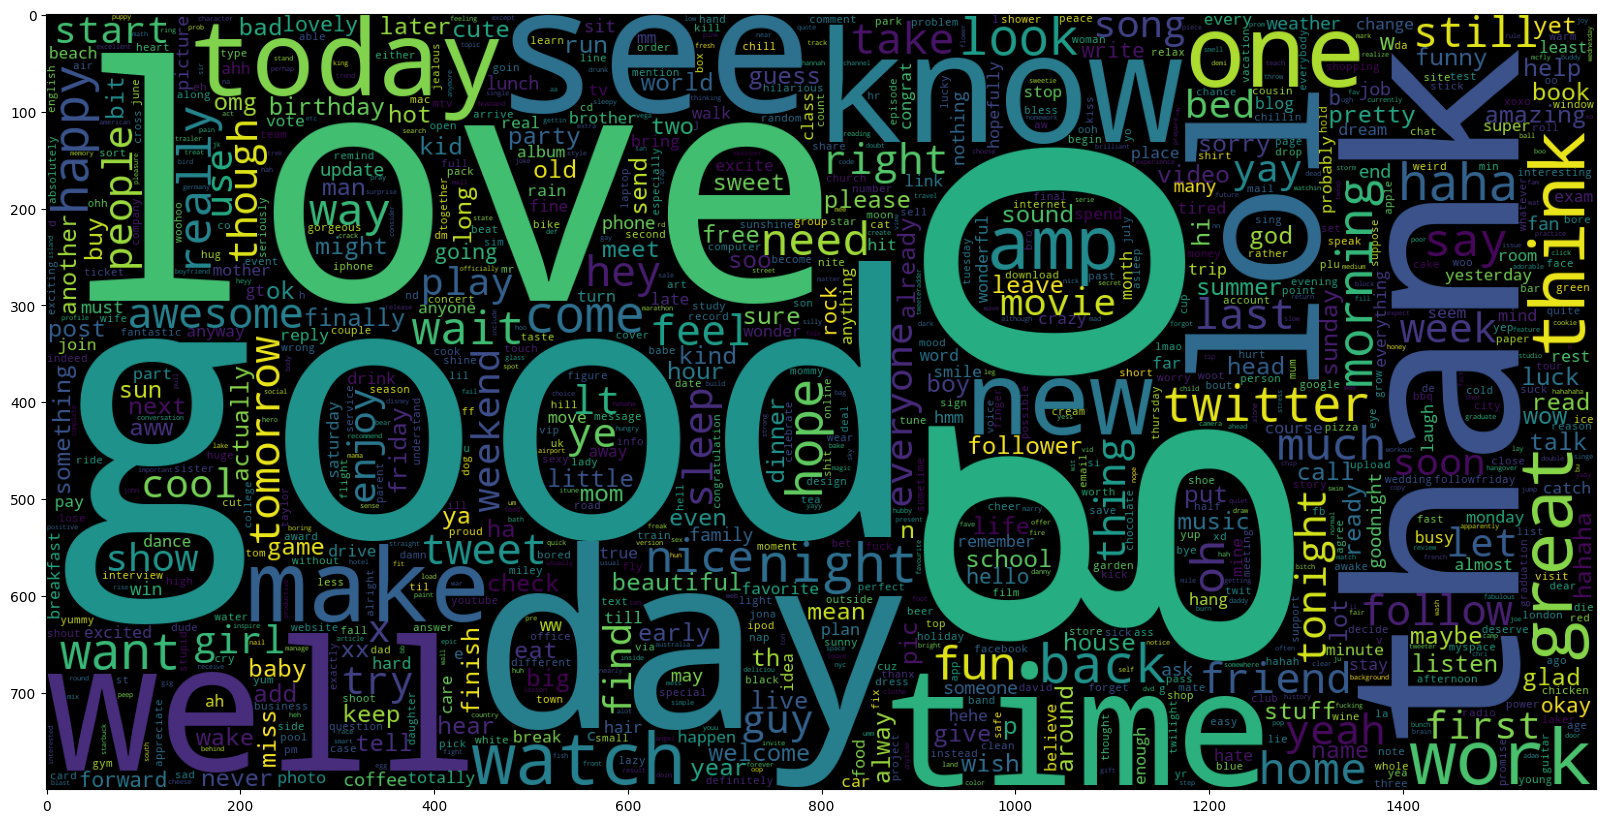

In [169]:
data_pos = df2[df2['target']==1]['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

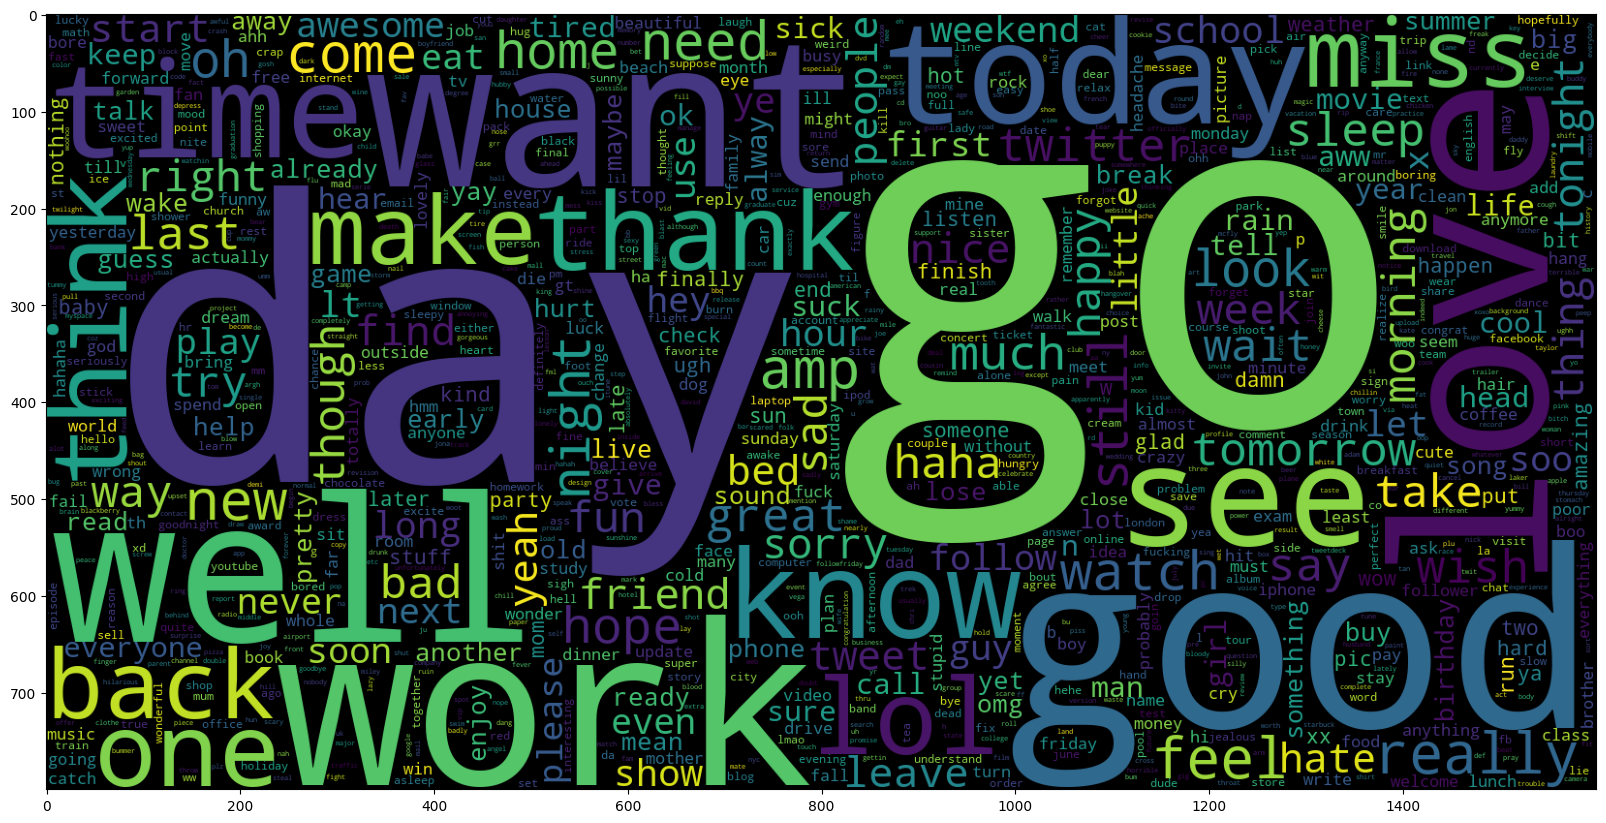

In [170]:
data_total = df2['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_total))
plt.imshow(wc)

In [171]:
with open('vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)
neg_doc_matrix2 = loaded_vectorizer.transform(df2[df2['target'] == 0]['text'])
print(neg_doc_matrix2)



  (0, 14355)	1
  (0, 29751)	1
  (0, 33314)	1
  (0, 49870)	1
  (0, 50005)	1
  (0, 80580)	1
  (0, 189562)	1
  (0, 211301)	1
  (1, 6241)	1
  (1, 23028)	1
  (1, 32164)	1
  (1, 46790)	1
  (1, 68306)	1
  (1, 134820)	1
  (1, 176222)	1
  (1, 183991)	1
  (1, 209557)	1
  (1, 213807)	1
  (1, 224271)	1
  (1, 224472)	1
  (2, 16173)	1
  (2, 26181)	1
  (2, 55634)	1
  (2, 82645)	1
  (2, 128491)	1
  :	:
  (796445, 122337)	1
  (796445, 190272)	1
  (796445, 197133)	1
  (796446, 82452)	1
  (796447, 69500)	1
  (796447, 158797)	1
  (796447, 176103)	1
  (796447, 181033)	1
  (796448, 1957)	1
  (796448, 72619)	1
  (796448, 121560)	1
  (796448, 140391)	1
  (796448, 177774)	1
  (796448, 196161)	1
  (796448, 211619)	1
  (796448, 224596)	1
  (796449, 66920)	1
  (796449, 72201)	1
  (796449, 89049)	1
  (796449, 175959)	1
  (796449, 202823)	1
  (796449, 223240)	1
  (796449, 234798)	1
  (796449, 236156)	1
  (796449, 239361)	1


In [172]:
with open('vectorizer2.pkl', 'rb') as f:
    loaded_vectorizer2 = pickle.load(f)
neg_doc_matrix2 = loaded_vectorizer2.transform(df2[df2['target'] == 0]['text'])
print(neg_doc_matrix2)

  (0, 14355)	0.26239332159114553
  (0, 29751)	0.37362894744985853
  (0, 33314)	0.5025641376601455
  (0, 49870)	0.35458643140794716
  (0, 50005)	0.17674992259818326
  (0, 80580)	0.1534265016011675
  (0, 189562)	0.4428249293239495
  (0, 211301)	0.4029575164311622
  (1, 6241)	0.26196493725006254
  (1, 23028)	0.35012910547045367
  (1, 32164)	0.1817225569732587
  (1, 46790)	0.2725889980672558
  (1, 68306)	0.29900520597978975
  (1, 134820)	0.2649084561252882
  (1, 176222)	0.3411898599366049
  (1, 183991)	0.23249412071531314
  (1, 209557)	0.4069225200712577
  (1, 213807)	0.18076436855821454
  (1, 224271)	0.26864015436013317
  (1, 224472)	0.317777067670631
  (2, 16173)	0.33600183467037825
  (2, 26181)	0.5030415378782974
  (2, 55634)	0.4483139607622664
  (2, 82645)	0.1435076083504415
  (2, 128491)	0.3463402004614594
  :	:
  (796445, 122337)	0.3816169163810142
  (796445, 190272)	0.357397311983668
  (796445, 197133)	0.5757622196104155
  (796446, 82452)	1.0
  (796447, 69500)	0.6200647096917108
  (

In [173]:
print(loaded_vectorizer)
print(loaded_vectorizer2)

CountVectorizer()
TfidfVectorizer()
